<a href="https://colab.research.google.com/github/FKz11/study_mpei/blob/main/lab1_out.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Обработка данных лабораторной работы 1

### Загружаем библиотеки

In [47]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

### Загружаем данные 

In [48]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [49]:
data1_real=pd.read_csv("/content/gdrive/MyDrive/Colab Notebooks/lab1_out.txt", sep=' ', names=['1', 'f1', '2', 'f2', 'f3', '3', 'f4', '4', 'f5', '5'])
data1_real.drop(['1', '2', '3', '4', '5'], axis=1, inplace=True)
data1_real.head()

,f1,f2,f3,f4,f5
0,0.1100,0.1100,-0.1100,0.1100,2.9300
1,0.1101,0.1101,-0.1101,0.1101,2.9295
2,0.1113,0.1123,-0.1125,0.1129,2.9249
3,0.1164,0.1179,-0.1207,0.1232,2.9151
4,0.1248,0.1268,-0.1343,0.1420,2.8952


In [50]:
dt=0.05
d1=0.033
l1=0.075
l2=0.155
l3=0.135
l45=0.2176

### 1. Определить законы управления по всем углам, проверить зависит ли максимальная скорость движения от модуля изменения угла. Определить параметры качества переходного процесса.

In [51]:
def diff(x):
  dx = np.concatenate([[0], (x[1:] - x[:-1]) / dt])
  return dx

In [52]:
for i in range(1,6):
  data1_real[f'v{i}'] = diff(data1_real[f'f{i}'].values)
data1_real.head()

,f1,f2,f3,f4,f5,v1,v2,v3,v4,v5
0,0.1100,0.1100,-0.1100,0.1100,2.9300,0.000,0.000,0.000,0.000,0.000
1,0.1101,0.1101,-0.1101,0.1101,2.9295,0.002,0.002,-0.002,0.002,-0.010
2,0.1113,0.1123,-0.1125,0.1129,2.9249,0.024,0.044,-0.048,0.056,-0.092
3,0.1164,0.1179,-0.1207,0.1232,2.9151,0.102,0.112,-0.164,0.206,-0.196
4,0.1248,0.1268,-0.1343,0.1420,2.8952,0.168,0.178,-0.272,0.376,-0.398


In [53]:
max_v = dict()
for i in range(1,6):
  max_v[f'v{i}'] = round(abs(data1_real[f'v{i}']).max(), 12)
max_v

{'v1': 1.38, 'v2': 0.754, 'v3': 1.686, 'v4': 2.434, 'v5': 1.612}

In [54]:
del_f = dict()
for i in range(1,6):
  del_f[f'f{i}'] = round(abs(abs(data1_real[f'f{i}'].values[-1]) - abs(data1_real[f'f{i}'].values[0])), 12)
del_f

{'f1': 1.39, 'f2': 0.39, 'f3': 1.39, 'f4': 1.89, 'f5': 0.83}

In [55]:
t = 0
t_list = []
for i in range(len(data1_real)):
  t_list.append(t)
  t += dt
data1_real['t'] = t_list
t -= dt
print(round(t, 12), 'c')
data1_real.head()

3.0 c


,f1,f2,f3,f4,f5,v1,v2,v3,v4,v5,t
0,0.1100,0.1100,-0.1100,0.1100,2.9300,0.000,0.000,0.000,0.000,0.000,0.00
1,0.1101,0.1101,-0.1101,0.1101,2.9295,0.002,0.002,-0.002,0.002,-0.010,0.05
2,0.1113,0.1123,-0.1125,0.1129,2.9249,0.024,0.044,-0.048,0.056,-0.092,0.10
3,0.1164,0.1179,-0.1207,0.1232,2.9151,0.102,0.112,-0.164,0.206,-0.196,0.15
4,0.1248,0.1268,-0.1343,0.1420,2.8952,0.168,0.178,-0.272,0.376,-0.398,0.20


In [56]:
def plot_f(df):
  fig, ax = plt.subplots(nrows=5, figsize=(10, 25))
  axs = ax.flatten()
  for i in range(5):

    axs[i].plot(df['t'], df[f'f{i+1}'])
    axs[i].set_title(f"f{i+1}")
    axs[i].set_xlabel("t, c", fontsize=12)
    axs[i].set_ylabel("f, рад.", fontsize=12)
    axs[i].set_xlim(min(df['t']), max(df['t']))
    axs[i].grid()

  plt.subplots_adjust(hspace=0.3)

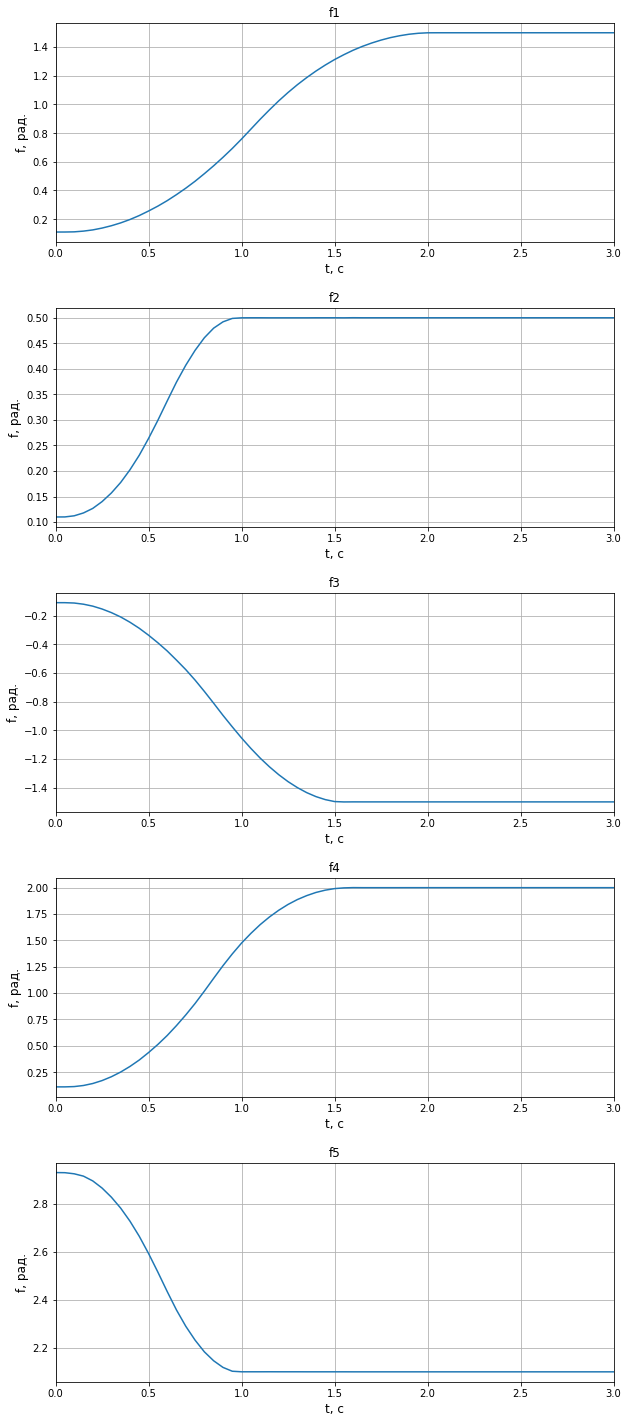

In [57]:
plot_f(data1_real)

In [58]:
def plot_v(df):
  fig, ax = plt.subplots(nrows=5, figsize=(10, 25))
  axs = ax.flatten()
  for i in range(5):

    axs[i].plot(df['t'], df[f'v{i+1}'])
    axs[i].set_title(f"v{i+1}")
    axs[i].set_xlabel("t, c", fontsize=12)
    axs[i].set_ylabel("v, рад./с", fontsize=12)
    axs[i].set_xlim(min(df['t']), max(df['t']))
    axs[i].grid()

  plt.subplots_adjust(hspace=0.3)

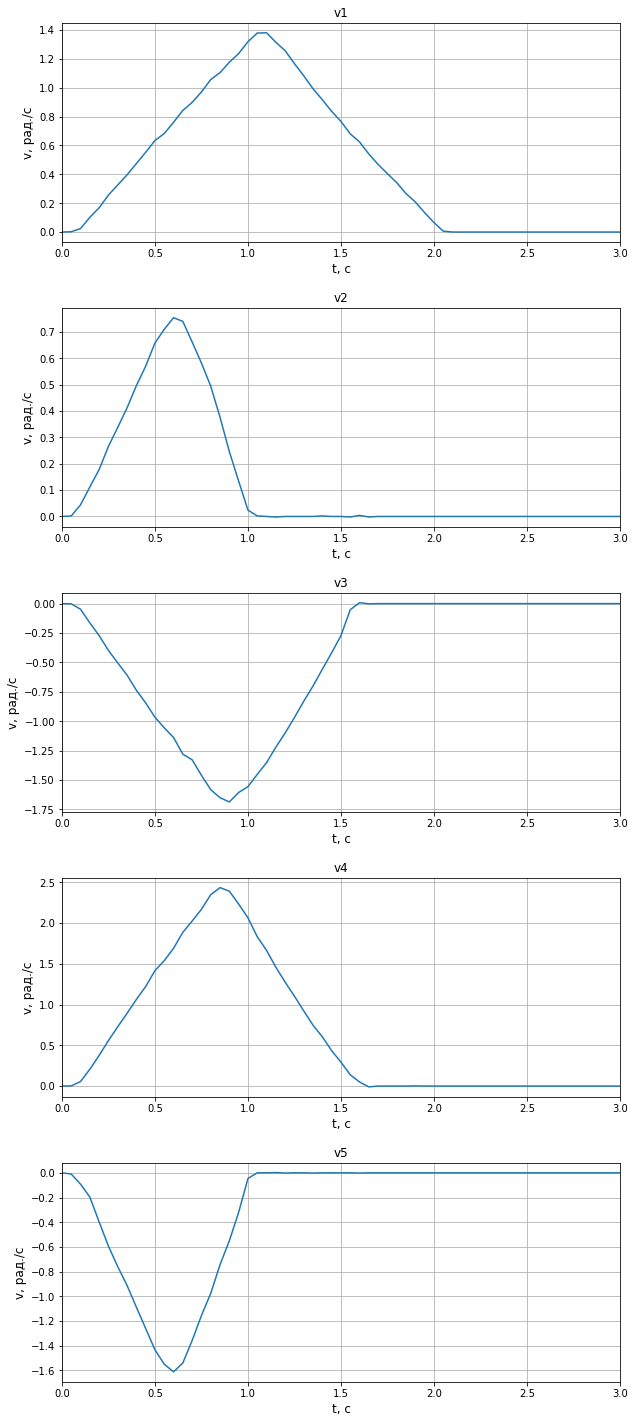

In [59]:
plot_v(data1_real)

In [60]:
def trans_proc_f(x):
  x_end = x[-1]
  if (x_end - x[0]) > 0:
    x_max = x.max()
  if (x_end - x[0]) < 0:
    x_max = x.min()
  over_reg_scal = x_max - x_end
  over_reg_proc = 100*over_reg_scal/x_end # %
  eps = 0.05 * abs(x_end)
  for i in range(len(x) - 1, -1, -1):
    if abs(x_end - x[i]) > eps:
      t_est = i*dt
      break
  print(f'Установившееся значение: {round(x_end, 12)} рад.\n'
        f'Максимальное значение: {round(x_max, 12)} рад.\n'
        f'Перерегулирование: {round(over_reg_scal, 12)} рад.\n'
        f'Относительное перерегулирование: {round(over_reg_proc, 12)} %\n'
        f'Допустимое отклонение: {round(eps, 12)} рад.\n'
        f'Время переходного процесса: {round(t_est, 12)} c\n')

In [61]:
for i in range(1, 6):
  print(f'Параметры качества переходного процесса f{i}\n')
  trans_proc_f(data1_real[f'f{i}'].values)
  if i != 5:
    print('#############################')
    print()

Параметры качества переходного процесса f1

Установившееся значение: 1.5 рад.
Максимальное значение: 1.5 рад.
Перерегулирование: 0.0 рад.
Относительное перерегулирование: 0.0 %
Допустимое отклонение: 0.075 рад.
Время переходного процесса: 1.65 c

#############################

Параметры качества переходного процесса f2

Установившееся значение: 0.5 рад.
Максимальное значение: 0.5001 рад.
Перерегулирование: 0.0001 рад.
Относительное перерегулирование: 0.02 %
Допустимое отклонение: 0.025 рад.
Время переходного процесса: 0.8 c

#############################

Параметры качества переходного процесса f3

Установившееся значение: -1.5 рад.
Максимальное значение: -1.5003 рад.
Перерегулирование: -0.0003 рад.
Относительное перерегулирование: 0.02 %
Допустимое отклонение: 0.075 рад.
Время переходного процесса: 1.3 c

#############################

Параметры качества переходного процесса f4

Установившееся значение: 2.0 рад.
Максимальное значение: 2.0004 рад.
Перерегулирование: 0.0004 рад.
Относит

### 2. Определить абсолютную и относительную погрешность позиционирования по углам.

In [62]:
data1_ideal = np.array([1.5, 0.5, -1.5, 2.0, 2.1])
data1_ideal

array([ 1.5,  0.5, -1.5,  2. ,  2.1])

In [63]:
df_err = dict(zip(['f1', 'f2', 'f3', 'f4', 'f5'], data1_ideal - data1_real[['f1', 'f2', 'f3', 'f4', 'f5']].values[-1]))
df_err

{'f1': 0.0, 'f2': 0.0, 'f3': 0.0, 'f4': 0.0, 'f5': 0.0}

In [64]:
d_err = dict(zip(['f1', 'f2', 'f3', 'f4', 'f5'], np.array(list(df_err.values())) / data1_ideal))
d_err

{'f1': 0.0, 'f2': 0.0, 'f3': -0.0, 'f4': 0.0, 'f5': 0.0}

### 3. На основании данных A2,A3,A4 в конечной точке определить положение схвата в системе координат (X,Z).

In [65]:
f_real = dict(zip(['f1', 'f2', 'f3', 'f4', 'f5'], data1_real[['f1', 'f2', 'f3', 'f4', 'f5']].values[-1]))
f_real

{'f1': 1.5, 'f2': 0.5, 'f3': -1.5, 'f4': 2.0, 'f5': 2.1}

In [66]:
def x_z_theta(f1, f2, f3, f4):
  xA = d1 + l2*np.sin(f2) + l3*np.sin(f2 + f3) + l45*np.sin(f2 + f3 + f4)
  zA = l1 + l2*np.cos(f2) + l3*np.cos(f2 + f3) + l45*np.cos(f2 + f3 + f4)
  yA = xA * np.tan(f1)
  theta = f2 + f3 + f4 - np.pi/2
  return xA, zA, yA, theta

In [67]:
xA, zA, yA, theta = x_z_theta(data1_real['f1'].values, data1_real['f2'].values, data1_real['f3'].values, data1_real['f4'].values)
dict(zip(['xA', 'zA', 'yA', 'theta'], [round(i, 4) for i in x_z_theta(f_real['f1'], f_real['f2'], f_real['f3'], f_real['f4'])]))

{'xA': 0.1768, 'zA': 0.4015, 'yA': 2.4934, 'theta': -0.5708}

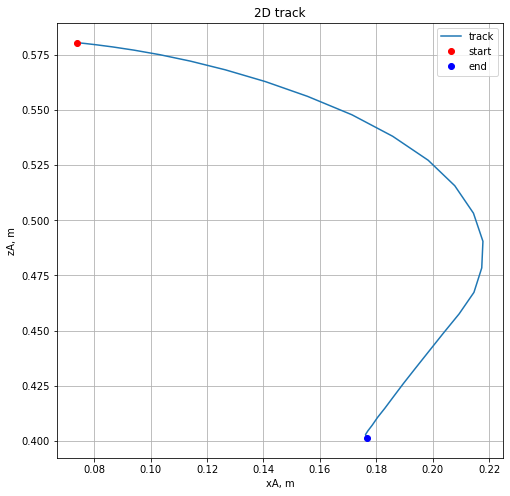

In [68]:
plt.figure(figsize=(8, 8))
plt.plot(xA, zA, label='track')
plt.plot(xA[0], zA[0], 'ro', label='start')
plt.plot(xA[-1], zA[-1], 'bo', label='end')
plt.title('2D track')
plt.xlabel('xA, m')
plt.ylabel('zA, m')
plt.legend()
plt.grid()
plt.show()

In [71]:
print(f'Start point: xA - {round(xA[0], 3)}, zA - {round(zA[0], 3)}, yA - {round(yA[0], 3)}')

Start point: xA - 0.074, zA - 0.58, yA - 0.008


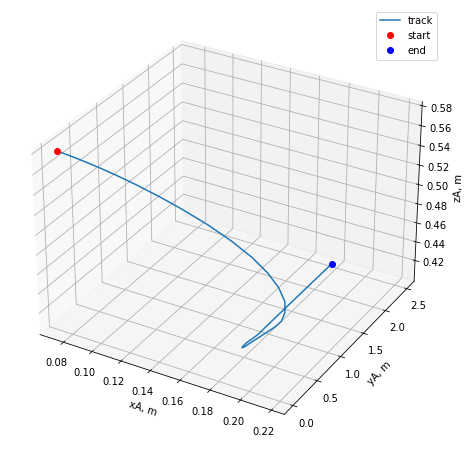

In [70]:
fig = plt.figure(figsize=(8, 8))
ax = plt.axes(projection="3d")
ax.plot(xA, yA, zA, label='track')
ax.plot(xA[0], yA[0], zA[0], 'ro', label='start')
ax.plot(xA[-1], yA[-1], zA[-1], 'bo', label='end')
ax.set_xlabel('xA, m')
ax.set_ylabel('yA, m')
ax.set_zlabel('zA, m')
ax.legend()
plt.show()